## **Load Housing Data**

In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
fetch_housing_data()

C:\Users\rahma\AppData\Local\Temp\ipykernel_14580\1387014147.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()

In [8]:
features = housing[['longitude', 'latitude', 'median_income']]

## **Preprocessing Data-missing values**

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [10]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [11]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [12]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [13]:
X = imputer.transform(housing_num)

In [14]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [15]:
imputer.strategy

'median'

In [16]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

## **Data Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

## **K-means Clustering**

In [20]:
from sklearn.cluster import KMeans

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test = train_test_split(features_scaled_df, test_size=0.2, random_state=42)

In [23]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(features_scaled_df)

In [24]:
y_pred

array([1, 1, 1, ..., 4, 4, 4])

In [25]:
y_pred is kmeans.labels_

True

In [26]:
kmeans.cluster_centers_

array([[ 0.86000421, -0.84755429, -0.40163141],
       [-1.19861317,  0.95722737,  1.21992137],
       [-0.07890855,  0.21343285, -0.62118909],
       [ 0.75613508, -0.82736641,  1.38323368],
       [-1.16541903,  1.24407729, -0.46281661]])

In [27]:
kmeans.labels_

array([1, 1, 1, ..., 4, 4, 4])

In [28]:
train_clusters = kmeans.labels_

In [29]:
import numpy as np

In [30]:
X_new = np.array([[-122.23, 37.88, 3], [-122.24, 37.86, 2.5], [-122.25, 37.85, 2.8],[-122.26, 37.84, 3.5], [-122.27, 37.83, 3.6],[-122.28, 37.82, 2.7], [-122.29, 37.81, 3.2],[-122.30, 37.80, 2.9]])
X_new_scaled=scaler.transform(X_new)
kmeans.predict(X_new)

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4, 4, 4, 4, 4, 4, 4, 4])

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


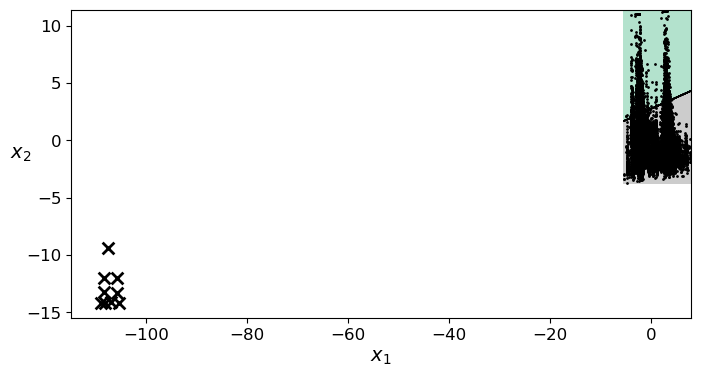

In [51]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

from sklearn.decomposition import PCA 
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True): 
    # Use PCA to reduce dimensionality to 2D for plotting 
    pca = PCA(n_components=2) 
    X_reduced = pca.fit_transform(X) 
    mins = X_reduced.min(axis=0) - 0.1 
    maxs = X_reduced.max(axis=0) + 0.1 
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution)) 
    Z = clusterer.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])) 
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2") 
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k') 
    plot_data(X_reduced) # Ensure your plot_data function works with the reduced dataset 
    if show_centroids: 
        centroids_reduced = pca.transform(clusterer.cluster_centers_) 
        plot_centroids(centroids_reduced) # Ensure your plot_centroids function works with reduced centroids

    if show_xlabels: 
        plt.xlabel("$x_1$", fontsize=14) 
    else: 
        plt.tick_params(labelbottom=False) 
    if show_ylabels: 
        plt.ylabel("$x_2$", fontsize=14, rotation=0) 
    else: 
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4)) 
plot_decision_boundaries(kmeans, features) 
plt.savefig("voronoi_plot") 
plt.show()

In [53]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=0)

Saving figure kmeans_algorithm_plot


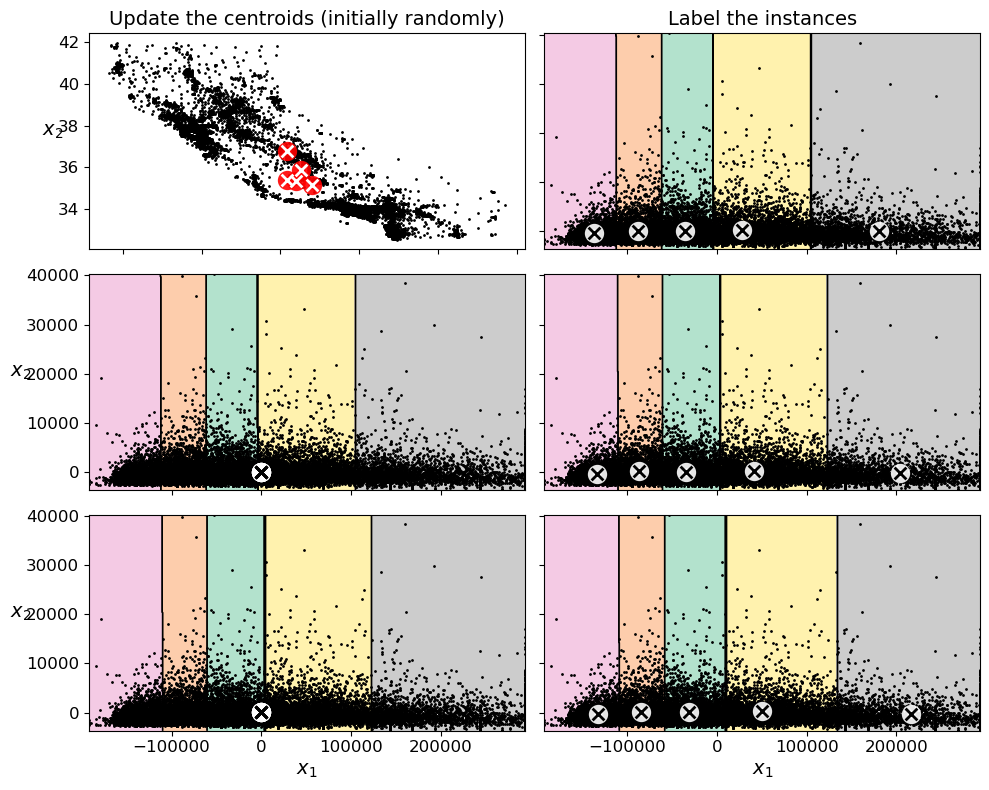

In [54]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

In [55]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


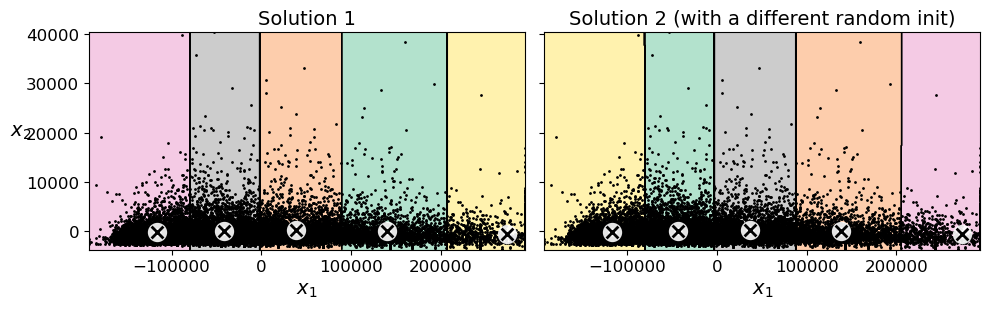

In [57]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

In [58]:
kmeans.inertia_

7149.206770234392

In [60]:
X_dist = kmeans.transform(features)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


321688033.6942586

In [62]:
kmeans.score(features)

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


-314197167.85930693

In [63]:
kmeans_rnd_init1.inertia_

12398342653416.63

In [64]:
kmeans_rnd_init2.inertia_

12399873274489.227

In [66]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="lloyd", random_state=2)
kmeans_rnd_10_inits.fit(features)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


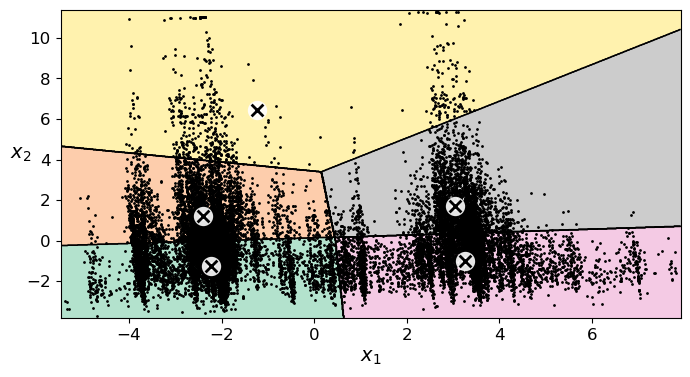

In [67]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, features)
plt.show()

In [68]:
KMeans()

KMeans()

In [70]:
good_init = np.array([[-3, 3, 2], [-3, 2, 3], [-3, 1, 4], [-1, 2, 2.5], [0, 2, 3]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(features)
kmeans.inertia_

48435.266553310736

In [71]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(features)

81.9 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


## **Evaluating the results-Optimize the Number of Clusters Using Silhouette Score**

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(features_scaled, kmeans.labels_)

0.4100830999013529

In [33]:
#kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                #for k in range(1, 10)]

In [34]:
#silhouette_scores = [silhouette_score(features_scaled, model.labels_)
                     #for model in kmeans_per_k[1:]]

In [35]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(features_scaled) for k in range(1, 10)]
silhouette_scores = [silhouette_score(features_scaled, model.labels_) for model in kmeans_per_k[1:]]


In [36]:
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure silhouette_score_vs_k_plot


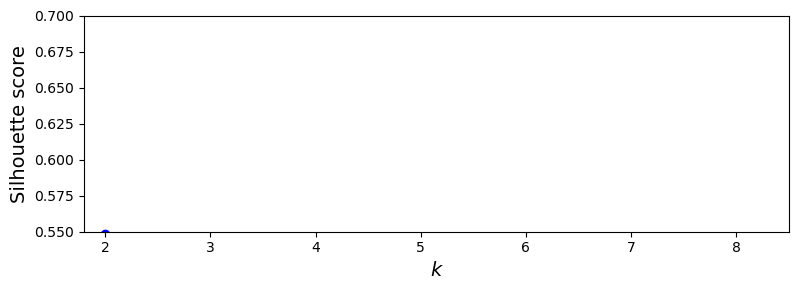

In [37]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

## **for finding optimal number of clusters**

In [38]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [39]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    X_2D = X[:, :2]
    clusterer1.fit(X_2D)
    clusterer2.fit(X_2D)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X_2D)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X_2D, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [40]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Saving figure bad_n_clusters_plot


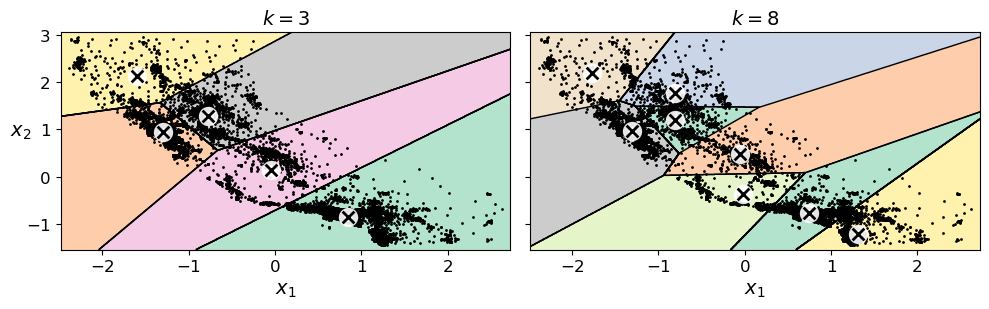

In [41]:
kmeans_k3 = KMeans(n_clusters=5, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, features_scaled[:, :2], "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [72]:
kmeans_k3.inertia_

2820.5905706550884

In [73]:
kmeans_k8.inertia_

1470.388423020726

In [76]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(features_scaled)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [78]:
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)


In [79]:
inertias

[251501.78859624703,
 101042.11855364995,
 73398.28002142053,
 56518.62955035725,
 47180.532021305626,
 39492.01964347797,
 34709.366505800295,
 33403.629160539385,
 29729.921211466408]

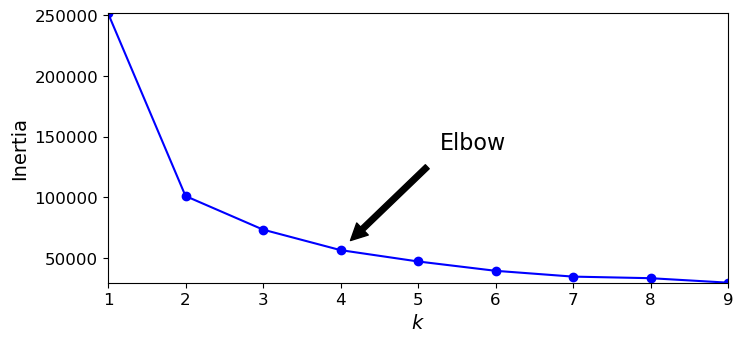

In [80]:
plt.figure(figsize=(8, 3.5)) 
plt.plot(range(1, 10), inertias, "bo-") 
plt.xlabel("$k$", fontsize=14) 
plt.ylabel("Inertia", fontsize=14) 
plt.annotate('Elbow', 
             xy=(4, inertias[3]), 
             xytext=(0.55, 0.55), 
             textcoords='figure fraction', 
             fontsize=16, 
             arrowprops=dict(facecolor='black', shrink=0.1) ) 
plt.axis([1, 9, min(inertias) - 50, max(inertias) + 50]) # Adjust y-axis limits based on inertias 
plt.savefig("inertia_vs_k_plot") 
plt.show()

C:\Users\rahma\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


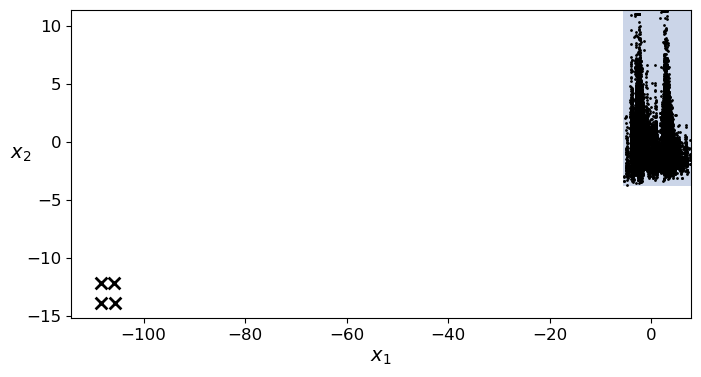

In [81]:
plt.figure(figsize=(8, 4)) 
plot_decision_boundaries(kmeans_per_k[3], features) 
plt.show()

## **Calculate Silhouette Scores for Different Cluster Configurations:**

Saving figure silhouette_score_vs_k_plot


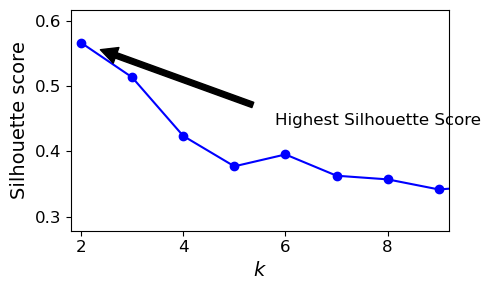

In [84]:
cluster_range = range(2, 15)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    score = silhouette_score(features, clusters)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(5, 3)) 
plt.plot(cluster_range, silhouette_scores, "bo-") 
plt.xlabel("$k$", fontsize=14) 
plt.ylabel("Silhouette score", fontsize=14) 
plt.axis([1.8, 9.2, min(silhouette_scores) - 0.05, max(silhouette_scores) + 0.05]) 
plt.annotate('Highest Silhouette Score', 
             xy=(cluster_range[np.argmax(silhouette_scores)], max(silhouette_scores)), 
             xytext=(0.55, 0.55), 
             textcoords='figure fraction', 
             fontsize=12, 
             arrowprops=dict(facecolor='black', shrink=0.1) ) 
save_fig("silhouette_score_vs_k_plot") 
plt.show()


Saving figure silhouette_analysis_plot


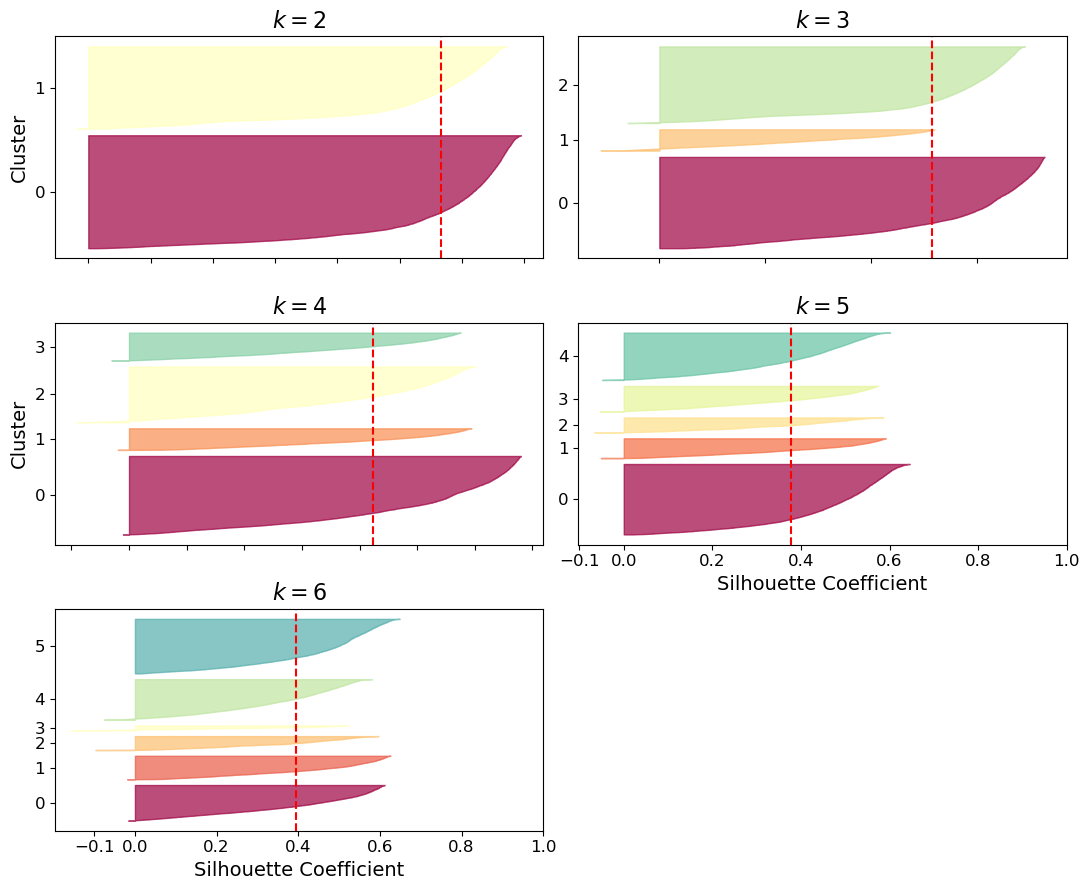

In [92]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

# Include k=2 in the range
for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)  # Adjust the subplot layout to accommodate 5 plots
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(features_scaled, y_pred)

    padding = len(features_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()


In [43]:
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters is: {optimal_k}')


The optimal number of clusters is: 2


In [44]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
final_clusters = kmeans_optimal.fit_predict(features_scaled)
housing['cluster'] = final_clusters


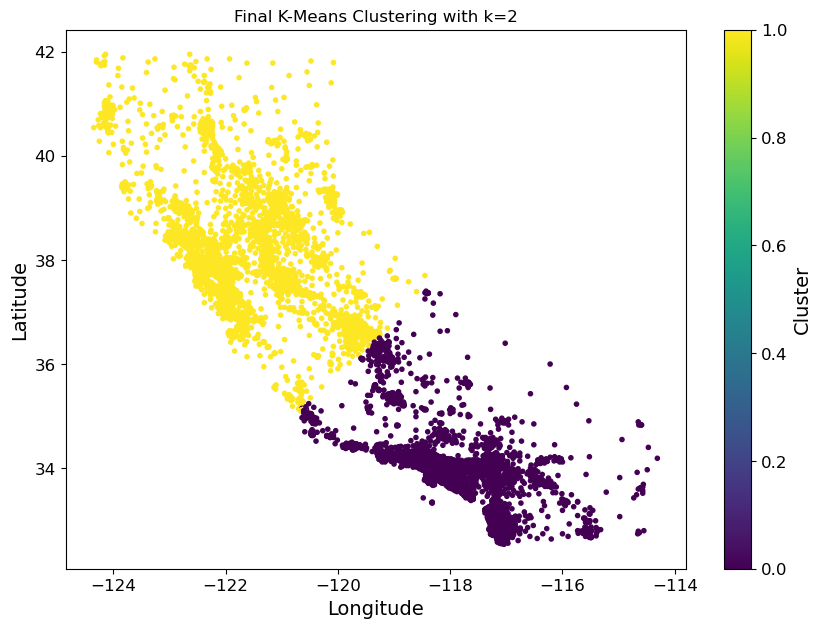

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(housing['longitude'], housing['latitude'], c=housing['cluster'], cmap='viridis', marker='.')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Final K-Means Clustering with k={optimal_k}')
plt.show()


## **Analysis of Cluster Characteristics***

In [46]:
cluster_sizes = housing['cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)


Cluster Sizes:
 cluster
0    11937
1     8703
Name: count, dtype: int64


In [47]:
cluster_summary = housing.groupby('cluster').agg({
    'median_income': ['mean', 'median'],
    'median_house_value': ['mean', 'median'],
    'housing_median_age': ['mean', 'median']
})
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
         median_income         median_house_value           housing_median_age  \
                 mean  median               mean    median               mean   
cluster                                                                         
0            3.922444  3.5882      213952.962637  185700.0          28.444500   
1            3.799659  3.4620      197121.400207  165600.0          28.906929   

                
        median  
cluster         
0         29.0  
1         28.0  


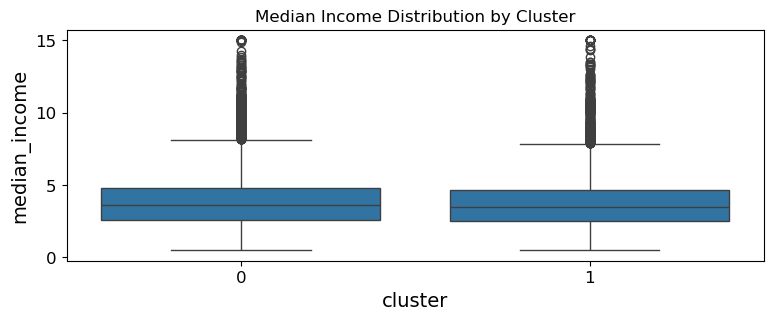

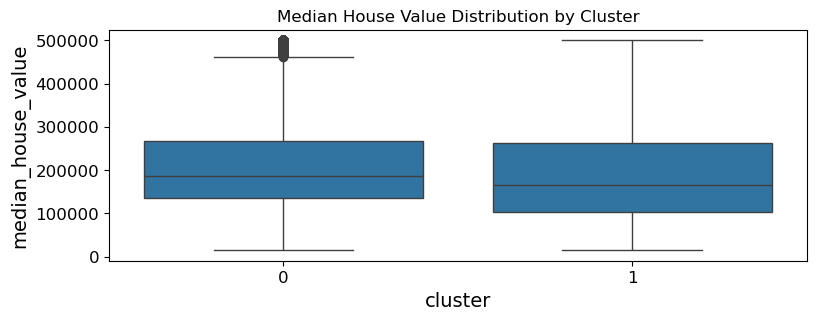

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))
sns.boxplot(x='cluster', y='median_income', data=housing)
plt.title('Median Income Distribution by Cluster')
plt.show()

plt.figure(figsize=(9, 3))
sns.boxplot(x='cluster', y='median_house_value', data=housing)
plt.title('Median House Value Distribution by Cluster')
plt.show()

